# Machine Learning for Time Series

Now, let's look at some examples of applying machine learning methods to time series analysis, a relatively new field of activity for **time series**. The machine learning methods we will study were not originally developed for specific **time series** data - unlike statistical models - although they have proven to be advantageous.

So far, we have focused on statistical models for **time series** predictions. By analyzing these models, we formulate an underlying theory about the dynamics of a **time series** and the statistics that describe the noise and uncertainty of its behavior. We then use the hypothetical dynamics of the process to make predictions and also to estimate our degree of uncertainty about them. Through these methods, both model identification and parameter estimation required us to think carefully about how best to represent the dynamics of our data.

Now, we will deal with methodologies for which we have not determined an underlying process or any rules for that same process. Therefore, we will focus on identifying patterns that relevantly describe the behavior of the process to predict the result of interest, such as the appropriate classification label for a **time series**. We will also talk about unsupervised learning for **time series** in the form of clustering. We will address prediction and classification with methodologies based on decision trees and clustering as a means of classification. In the case of methodologies based on decision trees, creating the characteristics of our **time series** is a necessary step to use this methodology, since decision trees are not "time-aware" methods, unlike, say, of an ARIMA model.

Now, when it comes to clustering and distance-based classification, we will see that we have the option of using the features or the original **time series** as input. To use the **time series** as input, we will study a metric known as *dynamic time warping* (DTW), which can be applied directly to the **time series**, preserving the complete chronological set of information in our data, rather than reducing it to a necessarily limited set of characteristics.

## Classificação de Séries Temporais

Analisaremos um exemplo de conversão de dados de **séries temporais** de eletroencefalograma (EEG) em características, que por sua vez podem ser usadas com algoritmos de aprendizado de máquina. Em seguida, usaremos métodos de árvore de decisão para classificar os dados do EEG depois de extrairmos as características das **séries temporais** EEG.

### Selecting and Generating Features

As we previously saw, a general overview of the objectives of generating **time series** characteristics. We also saw a brief example of generating features for a **time series** dataset using **tsfresh**. Now, we will generate features with another **time series** package that we have already analyzed: **cesium**

One of the main advantages of the **cesium** package is that it makes available a variety of useful **time series** datasets, including an EEG dataset from a 2001 research paper (hhtp://perma .cc/YZD5-CTJF). The five categories of EEG **time series** present in the dataset represent segments of equal length, taken from continuous temporal readings from EEG samples, which comprise:

- EEG recordings of healthy people with eyes open and closed (two separate categories);
- EEG recordings of patients with epilepsy at times when they did not have a seizure. The recordings comprise areas of the brain unrelated to seizures (two separate categories);
- intracranial EEG recordings during a seizure (one category);

We will download this dataset using a function provided by the **cesium** package:

In [1]:
# Installing libs
##!pip install cesium
##!pip install numpy==1.21.6
##!pip install matplotlib==3.4.3

In [2]:
# Importing libs
import os
import numpy as np
from cesium import datasets
import matplotlib.pyplot as plt
from cesium.featurize import featurize_time_series as ft

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/__init__.py:21: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.6)
  from scipy.sparse import issparse


##### Functions

In [3]:
# Function to save the plot
def save_plot(image_name, directory="images", dpi=300):
    """
    Save a plot to the specified directory with the given image name.
    
    Parameters:
        image_name (str): The name of the image file (e.g., "plot.png").
        directory (str): The base directory where images will be saved.
        dpi (int): The resolution of the saved image.
    """
    
    # Use the current working directory + images if no directory is specified
    directory = os.path.abspath(directory)
    
    # Ensure the directory exists
    os.makedirs(directory, exist_ok=True)
    
    # Construct the full file path
    file_path = os.path.join(directory, image_name)
    
    # Save the plot
    plt.savefig(file_path, dpi=dpi, bbox_inches="tight")
    print(f"Plot saved to {file_path}")

In [4]:
def save_table(table, file_name, base_directory="images"):
    """
    Save a table (e.g., DataFrame) to a subdirectory relative to the current working directory.
    
    Parameters:
        table (pd.DataFrame): The table to save.
        file_name (str): The name of the file (e.g., "table.csv").
        base_directory (str): The subdirectory where the table will be saved.
    """
    # Construct the full save directory relative to the current working directory
    save_directory = os.path.join(os.getcwd(), base_directory)
    
    # Ensure the directory exists
    os.makedirs(save_directory, exist_ok=True)
    
    # Construct the full file path
    file_path = os.path.join(save_directory, file_name)
    
    # Save the table as a CSV
    table.to_csv(file_path, index=False)
    print(f"Table saved to {file_path}")

In [5]:
# Loading the dataset
eeg = datasets.fetch_andrzejak()
eeg

Loaded data from cached archive.


{'times': [array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00

First, it's interesting to see some examples of the data we are analyzing to get an idea of ​​how we would like to classify these **time series**

Plot saved to /Users/dellacorte/py-projects/data-science/time-series-pocket-reference/machine-learning/images/eeg_measurements.png


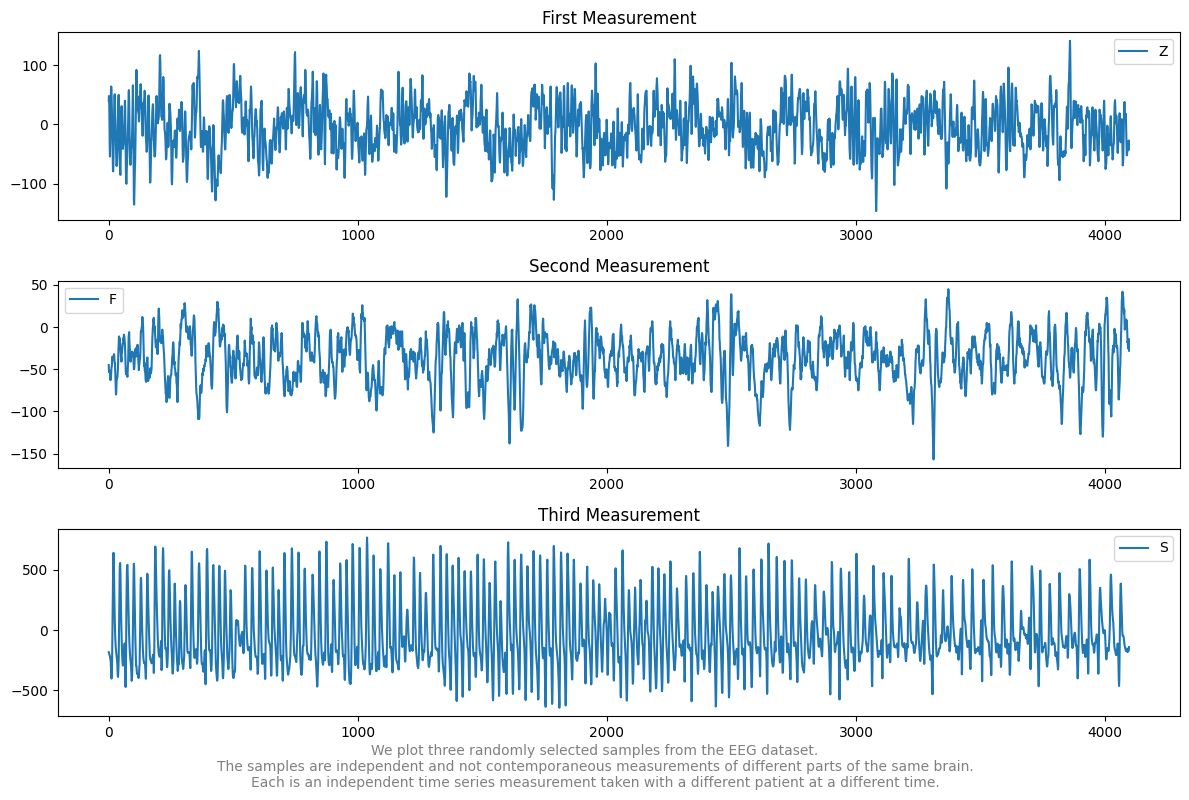

In [6]:
# Plot the data
plt.figure(figsize=(12, 8))

# Add subplots for EEG measurements
plt.subplot(3, 1, 1)
plt.plot(eeg["measurements"][0])
plt.title("First Measurement")
plt.legend([eeg["classes"][0]])

plt.subplot(3, 1, 2)
plt.plot(eeg["measurements"][300])
plt.title("Second Measurement")
plt.legend([eeg["classes"][300]])

plt.subplot(3, 1, 3)
plt.plot(eeg["measurements"][450])
plt.title("Third Measurement")
plt.legend([eeg["classes"][450]])

# Add a description below the plots
description = (
    "We plot three randomly selected samples from the EEG dataset.\n"
    "The samples are independent and not contemporaneous measurements of different parts of the same brain.\n"
    "Each is an independent time series measurement taken with a different patient at a different time."
)
plt.gcf().text(0.5, 0.01, description, fontsize=10, color="gray", ha="center")

# Adjust layout and save the plot
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Add space for description
save_plot("eeg_measurements.png")

# Show the plot
plt.show()

These visualizations serve as guidance for generating features. For example, classes Z and G appear to have less skewed data than class S. Additionally, each class has a quite different range of values, as we can see by inspecting the y-axis. This suggests that a amplitude feature may be useful. Furthermore, it is not just the general amplitude, but the general distribution of points that appears characteristically different in the three classes. In our analysis, we will use these and other characteristics, and then look at the code to generate them.

Now, we will generate the characteristics with the **cesium** package

In [7]:
# List of features to extract from the time series data
features_to_use = ["amplitude",
                   "percent_beyond_1_std",
                   "percent_close_to_median",
                   "skew",
                   "max_slope"]

# Generate feature set using Cesium's featurization function
fset_cesium = ft(times           = eeg["times"],
                 values          = eeg["measurements"],
                 errors          = None,
                 features_to_use = features_to_use,
                 scheduler       = None)

In [8]:
# Display the first few rows of the resulting feature set
print(fset_cesium.head())

# Save the feature set as a CSV file in the "images" directory
save_table(fset_cesium, "eeg_features.csv")

feature amplitude percent_beyond_1_std percent_close_to_median      skew  \
channel         0                    0                       0         0   
0           143.5             0.327313                0.505004  0.032805   
1           211.5             0.290212                0.640469 -0.092715   
2           165.0             0.302660                0.515987 -0.004100   
3           171.5             0.300952                0.541128  0.063678   
4           170.0             0.305101                0.566268  0.142753   

feature     max_slope  
channel             0  
0        11107.796610  
1        20653.559322  
2        13537.627119  
3        17008.813559  
4        13016.949153  
Table saved to /Users/dellacorte/py-projects/data-science/time-series-pocket-reference/machine-learning/images/eeg_features.csv


Note that many of these values ​​are not normalized. Therefore, we would take this into account if we were using a technique that assumed normalized inputs. We must also validate that we understand what our characteristics are indicating and that our understanding corresponds to the **cesium** package calculation.

To illustrate error checking and common sense assertion, we can check the *percent_beyond_1_std* for a sample **time series**

In [13]:
np.std(eeg["measurements"][0])

40.41100040099819

In [14]:
np.mean(eeg["measurements"][0])

-4.1320478398828415

In [21]:
sample_ts = eeg["measurements"][0]
sz = len(sample_ts)
ll = -4.13 - 40.411
ul = -4.13 + 40.411

quals = [i for i in range(sz) if sample_ts[i] < ll or sample_ts[i] > ul]

len(quals) / len(sample_ts)

0.3273126678057115

### Decision Tree Methods

Decision tree-based methods portray the way humans decide things: one step at a time and in a non-linear way. They depict the way we make complicated decisions: one step at a time, thinking about how one variable should impact our decision, and then another, like a flowchart.

There are countless examples of people behaving like a decision tree when analyzing **time series** data. For example, a trader who works in the discretionary stock market may use technical indicators. But these indicators will likely be used in a serial hierarchical fashion, like a tree - first asking, for example, which direction the momentum indicator's trend is taking according to a technical indicator, before asking how the swing is evolving along the way. of time. The answer to this second question interacts with the answer to the first in a non-linear, tree-like way. It is very likely that traders have a decision tree structure in their brain, enabling them to make predictions about the direction the market is taking.

The same thing happens when a healthcare professional reads an EEG or an ECG. It is not uncommon for them to first look for the presence of one characteristic before considering another, working sequentially through a series of factors. If one characteristic is present and another is not, the result will be a different diagnosis and, consequently, a different prediction regarding the patient's prognosis.

We will use the features we generate from the EEG data as inputs for two different decision tree methods: random forest and gradient tree boosting. Both can be used in classification tasks. Our task will be to classify the EEG data we analyze solely based on the features we generate from the raw data.

#### Random Forest
